# Detection of  graph community between the interaction between student

This work models the interconnection between the students of the African Institute for Mathematical Sciences during lunch in the common restaurant dedicated to this purpose.

In [1]:
#Importation of libraries
import networkx as nx
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pylab as plt

In [2]:
#Importation of data
data = pd.read_csv("restaurant.csv")
data1 = data[["Select your name",'Select your first colleagues','Select scond colleagues']]
data1.columns =["name","colleague1","colleague2"]
data1.head()

,name,colleague1,colleague2
0,Saliou FALL,Faith KIMONGO,Collins F. Owino OLOO
1,KANINGINI LUTALA Netho Junior,Arnaud WATUSADISI MAVAKALA,Rosine Agatha Nathalie FAYE
2,Collins F. Owino OLOO,Faith KIMONGO,Idowu Esther IJAODORO
3,Arnaud WATUSADISI MAVAKALA,Arame THIAM,KANINGINI LUTALA Netho Junior
4,Faith KIMONGO,Collins F. Owino OLOO,Saliou FALL


In [3]:
equip1 = [(data1.name[i],data1.colleague1[i]) for i in range(data1.shape[0])]
for i in range(data.shape[0]):
    equip1.append((data1.name[i],data1.colleague2[i]))
    

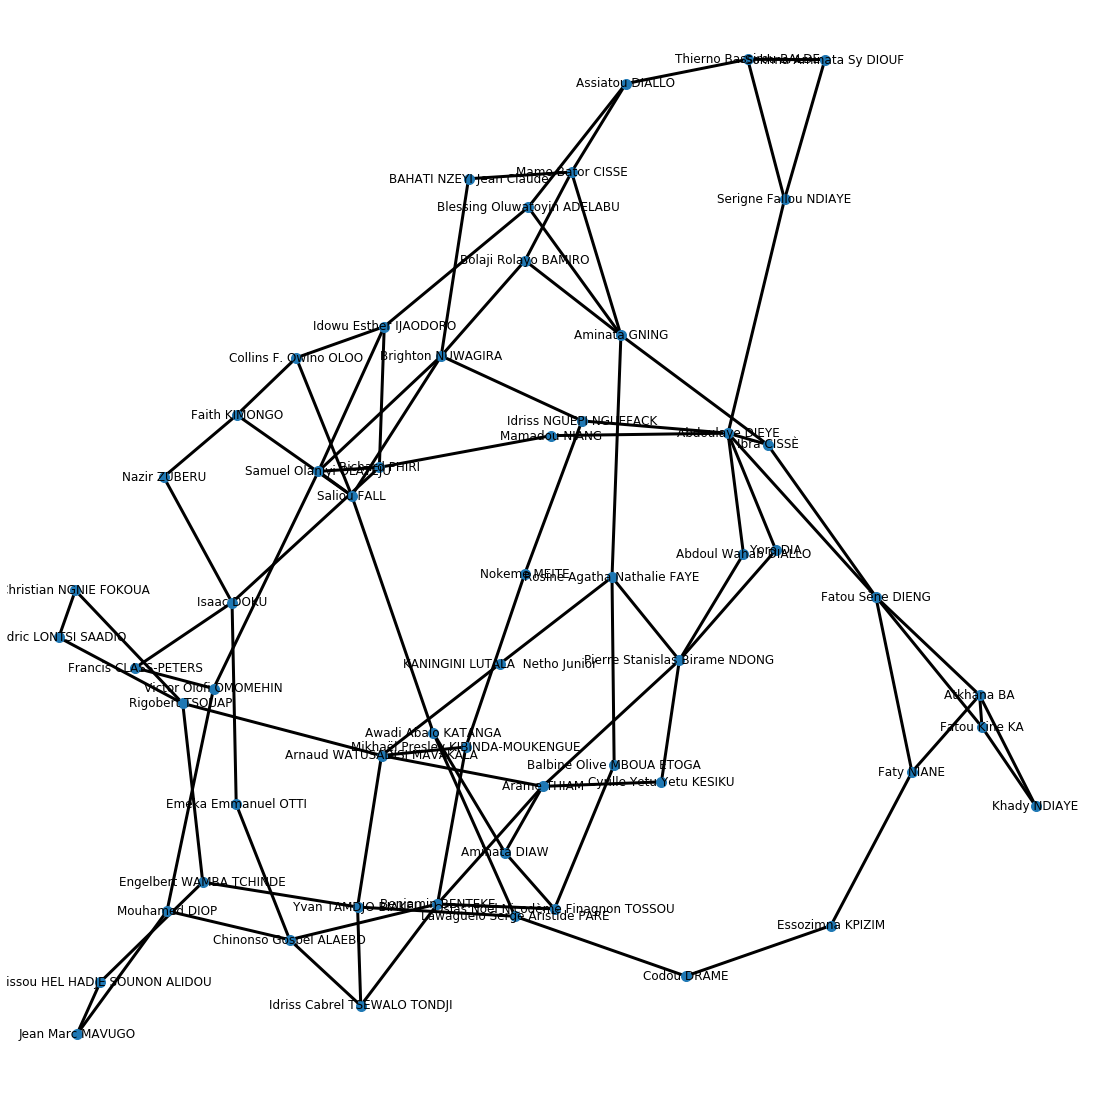

In [4]:
#Creation of the graph
options = {
          'node_size': 100,
          'width': 3,
          }
G = nx.Graph()
G.add_edges_from(equip1)
plt.figure(figsize=(15,15))
nx.draw(G,with_labels=True,**options)
plt.show()

In [10]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 58\nNumber of edges: 93\nAverage degree:   3.2069'

In [5]:
print("il y\' a {} noeuds et {} arretes '".format(len(G.nodes),len(G.edges)))

il y' a 58 noeuds et 93 arretes '


### Coompute of degree

In [6]:
noms =[]
degre =[]
for i in G.degree():
    noms.append(i[0])
    degre.append(i[1])
resultdegree = pd.DataFrame({"noms":noms, 
                             "degree":degre}).sort_values(by='degree',
                                                           ascending=False)
resultdegree.head()

,noms,degree
37,Abdoulaye DIEYE,7
0,Saliou FALL,5
35,Aminata GNING,5
16,Samuel Olaniyi OLATEJU,5
22,Brighton NUWAGIRA,5


In [7]:
resultdegree.degree.describe()

count    58.000000
mean      3.206897
std       1.166170
min       2.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: degree, dtype: float64

In [8]:
test = Counter(resultdegree.degree)
test

Counter({7: 1, 5: 9, 4: 9, 3: 20, 2: 19})

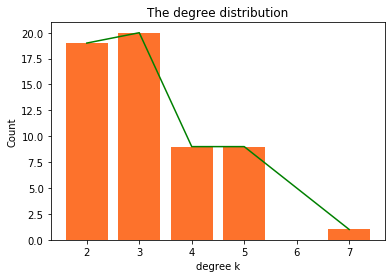

In [9]:
Nk= Counter(resultdegree.degree)
K= sorted(list(Nk))
PK = [Nk[i] for i in K]
plt.bar(K,PK,color="#fd722c")
plt.plot(K,PK,color='green')
plt.title("The degree distribution")
plt.xlabel("degree k")
plt.ylabel("Count")
plt.show()

There is a certain herogeneity in the student population

In [11]:
#All the neigghbors of the student Abdoulaye DIEYE
nx.adj_matrix(G)
test = nx.all_neighbors(G,"Abdoulaye DIEYE")
for t in test:
    print(t)

Idriss NGUEPI NGUEFACK
Mamadou NIANG
Fatou Sène DIENG
Ibra CISSÈ
Abdoul Wahab DIALLO
Serigne Fallou NDIAYE
Yoro DIA


In [12]:
#The transitivity of the graph
nx.transitivity(G)

0.14754098360655737

In [13]:
nx.average_clustering(G) # Average clustering coefiscient

0.1881773399014778

In [14]:
LocalCoef = pd.DataFrame({"names":list(nx.clustering(G).keys()),"Localcoef":list(nx.clustering(G).values()) }) 
LocalCoef.head(10) # local clustering coefiscient

,names,Localcoef
0,Saliou FALL,0.200000
1,Faith KIMONGO,0.333333
2,KANINGINI LUTALA Netho Junior,0.000000
3,Arnaud WATUSADISI MAVAKALA,0.000000
4,Collins F. Owino OLOO,0.333333
5,Arame THIAM,0.100000
6,Osias Noël Nicodème Finagnon TOSSOU,0.000000
7,Aminata DIAW,0.000000
8,Nazir ZUBERU,0.000000
9,Christian NGNIE FOKOUA,1.000000


In [21]:
Degcentral = pd.DataFrame({"names":list(nx.degree_centrality(G).keys()),"DegreeCentral":list(nx.degree_centrality(G).values()) }) 
Degcentral.DegreeCentral.describe()

count    58.000000
mean      0.056261
std       0.020459
min       0.035088
25%       0.035088
50%       0.052632
75%       0.070175
max       0.122807
Name: DegreeCentral, dtype: float64

In [16]:
Adj = nx.to_numpy_matrix(G)
AdjMatrix = np.dot(np.dot(Adj,Adj),Adj)
Nbre = [AdjMatrix[i,i] for i in range(58)]
TriangleNber = sum(Nbre)/6
TriangleNber

12.0

In [89]:
nx.wiener_index(G)

6703.0

In [23]:
Adj = nx.to_numpy_matrix(G)
Adj

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
Dist = nx.floyd_warshall_numpy(G,nodelist=range(1,60))
Dist

matrix([[ 0., inf, inf, ..., inf, inf, inf],
        [inf,  0., inf, ..., inf, inf, inf],
        [inf, inf,  0., ..., inf, inf, inf],
        ...,
        [inf, inf, inf, ...,  0., inf, inf],
        [inf, inf, inf, ..., inf,  0., inf],
        [inf, inf, inf, ..., inf, inf,  0.]])

In [31]:
dist = nx.shortest_path_length(G)
for d in dist:
    print(d)

('Saliou FALL', {'Saliou FALL': 0, 'Faith KIMONGO': 1, 'Samuel Olaniyi OLATEJU': 1, 'Brighton NUWAGIRA': 1, 'Collins F. Owino OLOO': 1, 'Awadi Abalo KATANGA': 1, 'Nazir ZUBERU': 2, 'Victor Olofi OMOMEHIN': 2, 'Richard PHIRI': 2, 'Idowu Esther IJAODORO': 2, 'Bolaji Rolayo BAMIRO': 2, 'BAHATI NZEYI Jean Claude': 2, 'Idriss NGUEPI NGUEFACK': 2, 'Lawaguelo Serge Aristide PARE': 2, 'Aminata DIAW': 2, 'Isaac DOKU': 3, 'Francis CLASS-PETERS': 3, 'Mouhamed DIOP': 3, 'Mamadou NIANG': 3, 'Blessing Oluwatoyin ADELABU': 3, 'Aminata GNING': 3, 'Mame Bator CISSE': 3, 'Abdoulaye DIEYE': 3, 'Nokeme MEITE': 3, 'Codou DRAME': 3, 'Yvan TAMDJO BIAKEU': 3, 'Osias Noël Nicodème Finagnon TOSSOU': 3, 'Arame THIAM': 3, 'Emeka Emmanuel OTTI': 4, 'Chinonso Gospel ALAEBO': 4, 'Jean Marc MAVUGO': 4, 'Assiatou DIALLO': 4, 'Rosine Agatha Nathalie FAYE': 4, 'Ibra CISSÈ': 4, 'Fatou Sène DIENG': 4, 'Abdoul Wahab DIALLO': 4, 'Serigne Fallou NDIAYE': 4, 'Yoro DIA': 4, 'Mikhaël Presley KIBINDA-MOUKENGUE': 4, 'Essozimna KP

In [33]:
#The center of the graph
nx.center(G)

['Nokeme MEITE']

In [34]:
#The radius of the graph
nx.radius(G)

5

In [35]:
nx.diameter(G)

9

In [11]:
## Community detection

import networkx.algorithms.community as nxcom
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)
# Count the communities
len(communities)

8

In [12]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

In [13]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [14]:
 #Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

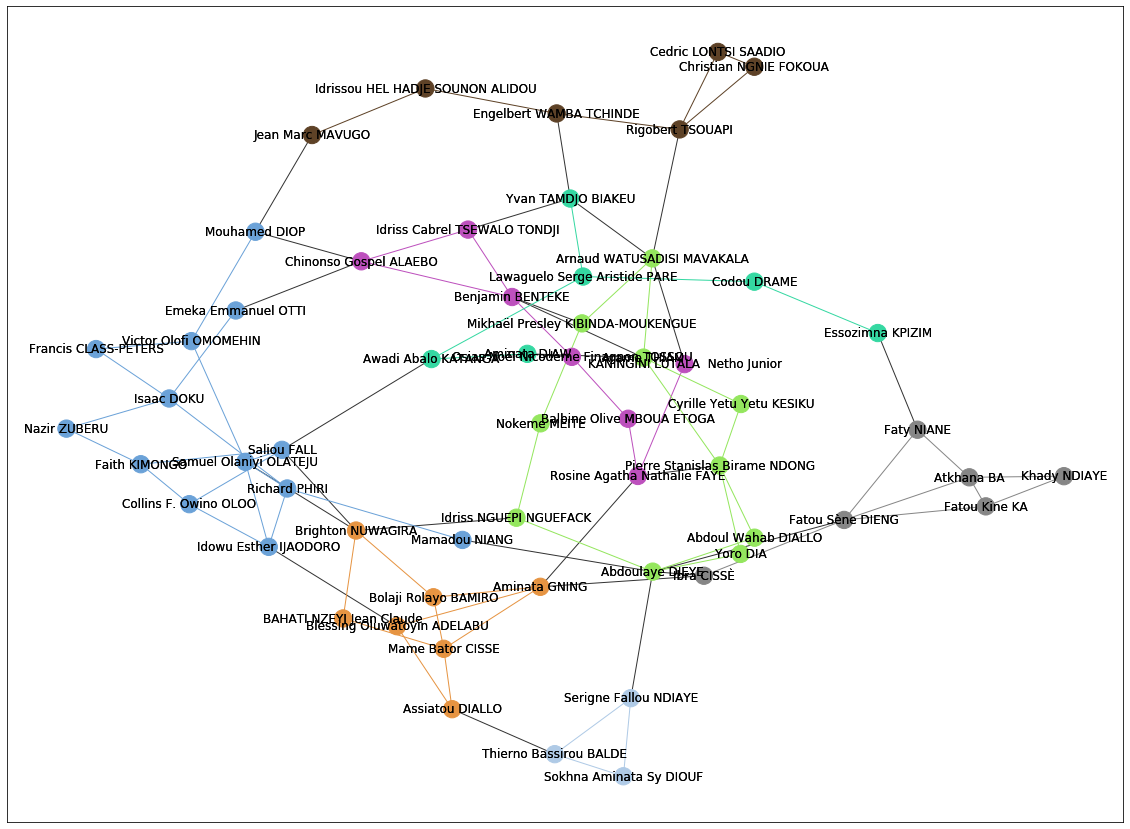

In [25]:
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 15))
# Draw external edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=1,
    edgelist=external,
    edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

From the graph above, we deduce that there are 8 communities

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


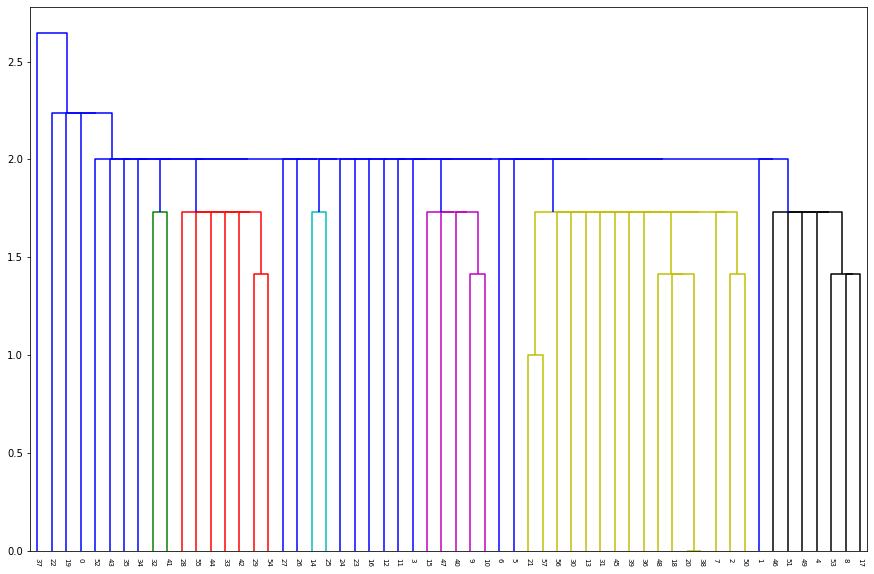

In [88]:
#Community detection with dendomgram

from scipy.cluster.hierarchy import dendrogram,linkage
dist = nx.to_numpy_matrix(G)
plt.figure(figsize=(15,10))
mergings = linkage(dist,method='single')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           #labels= colonne,
           leaf_rotation=-90,leaf_font_size=7
          )
# y=2.7* np.ones(5000)
# x = range(len(y))
# plt.plot(x,y,color='red')
plt.show()

#Dendrogram = shc.dendrogram((shc.linkage(dist, method ='ward')))

In [5]:
nx.barycenter(G)

['Brighton NUWAGIRA']

In [22]:
#betweenness relations
bt = nx.betweenness_centrality(G)
btw = pd.DataFrame({"Name": list(bt.keys()),"betweeness": list(bt.values())}).sort_values('betweeness',ascending=False)
btw.head(5)

,Name,betweeness
37,Abdoulaye DIEYE,0.228718
3,Arnaud WATUSADISI MAVAKALA,0.142153
35,Aminata GNING,0.130493
28,Fatou Sène DIENG,0.130184
5,Arame THIAM,0.115752


In [19]:
#closeness distribution
cl = nx.closeness_centrality(G)
clx = pd.DataFrame({"Name": list(cl.keys()),"betweeness": list(cl.values())}).sort_values('betweeness',ascending=False)

In [24]:
clx.head()

,Name,betweeness
22,Brighton NUWAGIRA,0.303191
36,Idriss NGUEPI NGUEFACK,0.300000
37,Abdoulaye DIEYE,0.300000
35,Aminata GNING,0.295337
5,Arame THIAM,0.293814
